In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("BTC_USD_10_years.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,33382021890
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,28333.972656,24220433689
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,27493.285156,25980310960
3111,2023-03-25,27487.337891,27791.826172,27196.234375,27494.707031,27494.707031,13383005987


In [86]:

data.index = pd.to_datetime(data["Date"], format = '%Y-%m-%d')


#data.index = pd.to_datetime(data["Local time in Chofu (airport)"], format = ''%d.%m.%Y %H:%M)

#priceAndVolume = dataFrame[["High", "Volume"]]
price = data['Open']

In [87]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_range = list(range(0, len(data)))
X = pd.DataFrame(x_range)



In [88]:

#X = pd.DataFrame(dataFrame.index)


model.fit(X,Y)
trend = model.predict(X)

<Axes: xlabel='Date'>

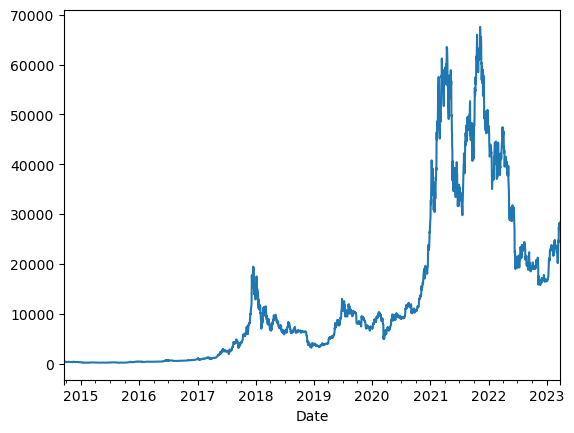

In [89]:
#priceData.plot()
price.plot()

In [90]:
x = data.index
y = data['Open']

x

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20',
               '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
               '2023-03-25', '2023-03-26'],
              dtype='datetime64[ns]', name='Date', length=3113, freq=None)

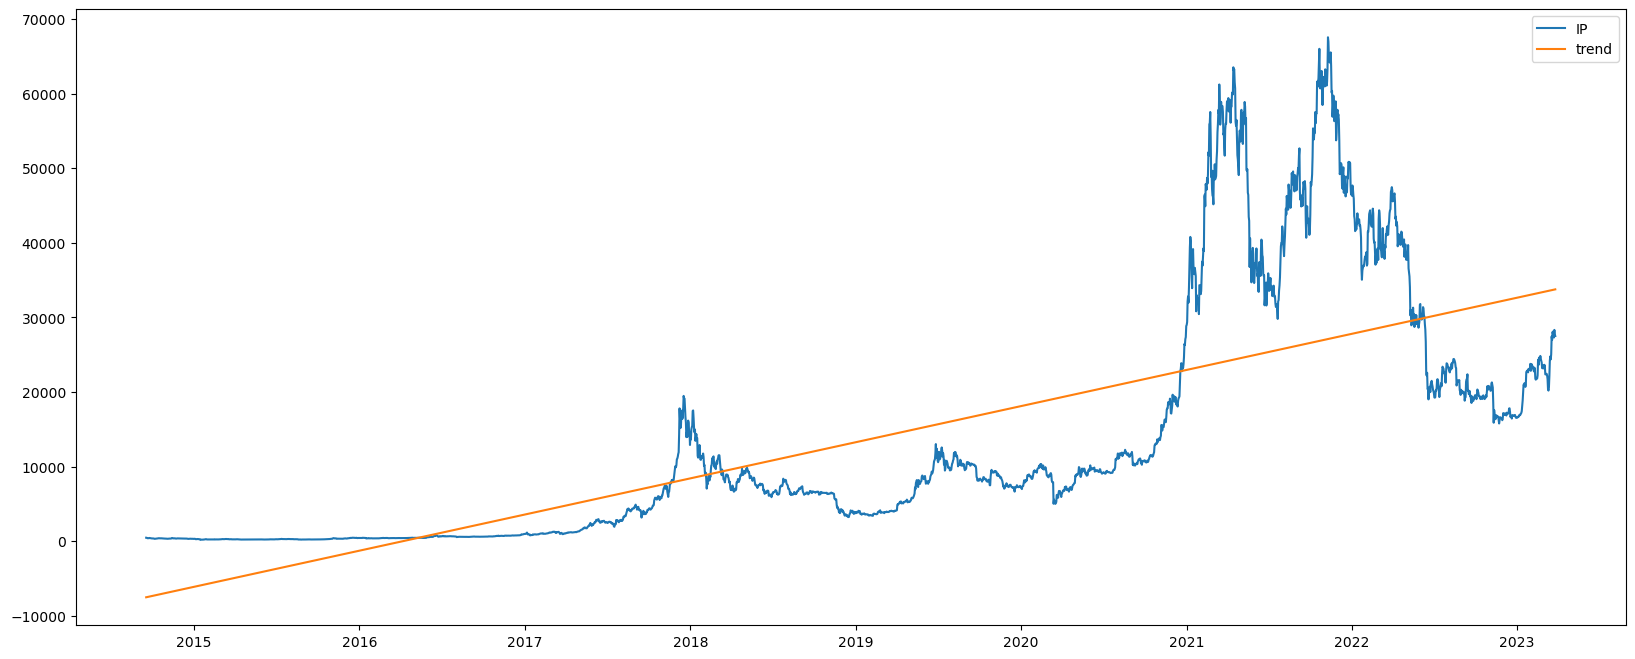

In [91]:
plt.figure(figsize=(20,8))
plt.plot(x,y,label='IP')
plt.plot(x, trend, label = 'trend')
plt.legend()

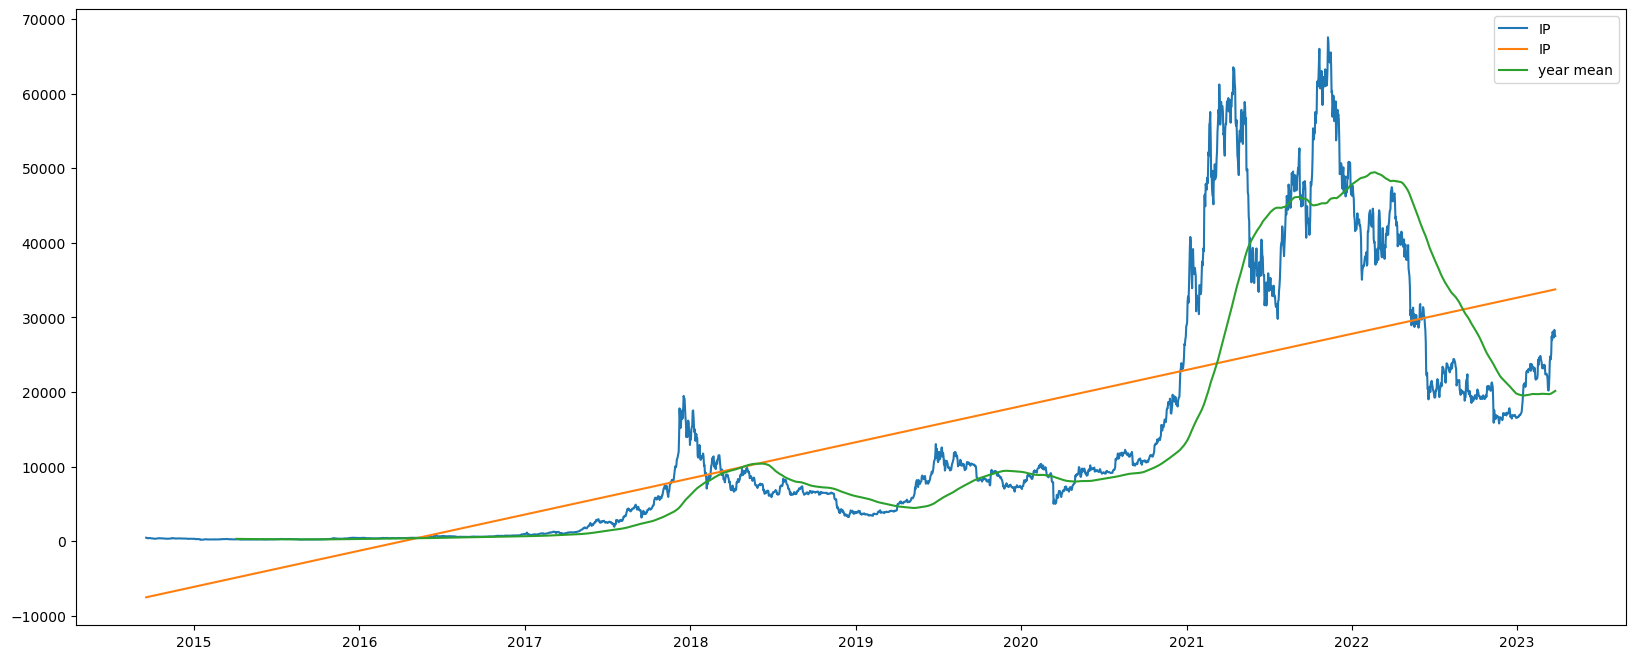

In [92]:
x = data.index
y = data['Open'].rolling(200).mean()

plt.figure(figsize=(20,8))
plt.plot(x,data['Open'],label='IP')
plt.plot(x, trend, label = 'IP')
plt.plot(x, y, label = 'year mean')
plt.legend()

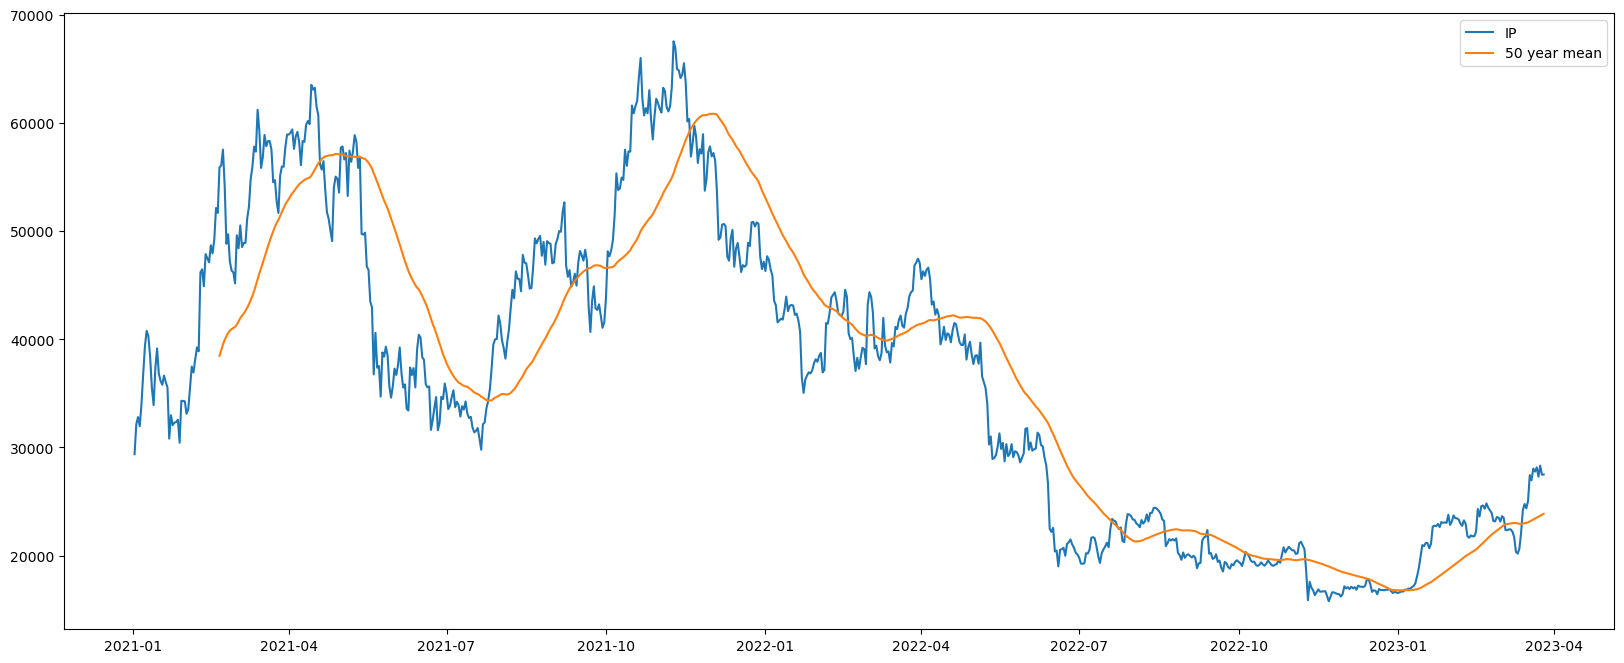

In [117]:
start_year = 2021
rolling_period = 50

start_date = pd.Timestamp(day=1, month = 1, year = start_year)

data_short = data[data.index > start_date]

x = data_short.index
y = data_short['Open']

plt.figure(figsize=(20,8))
plt.plot(x,data_short['Open'],label='IP')
#plt.plot(x, trend, label = 'IP')
plt.plot(x, data_short['Open'].rolling(rolling_period).mean(), label = '{} days mean'.format(rolling_period))
plt.legend()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

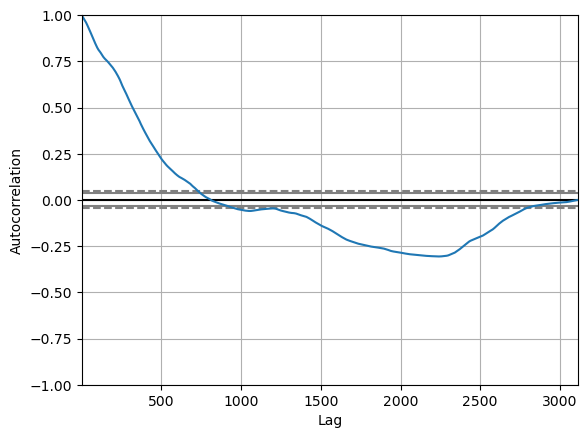

In [121]:
pd.plotting.autocorrelation_plot(data['Open'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

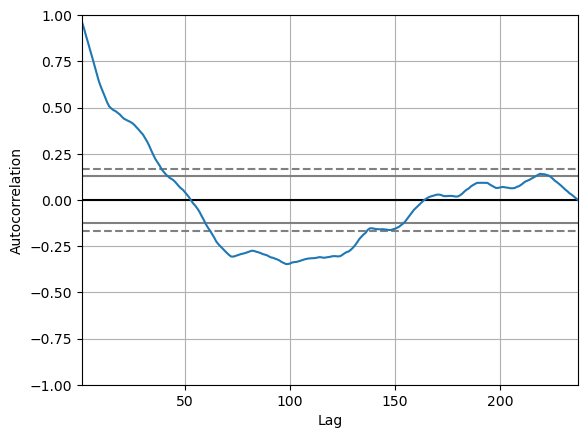

In [126]:
start_year = 2022
start_month = 8
start_day = 1

start_date = pd.Timestamp(day=start_day, month = start_month, year = start_year)

data_short = data[data.index > start_date]


pd.plotting.autocorrelation_plot(data_short['Open'])